In [1]:
import os
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
list_train = glob.glob('../Road_Signs_Screens' + '/*/*.csv')
list_train

['../Road_Signs_Screens/4/05.07.2022 (full)_csv.csv',
 '../Road_Signs_Screens/5 Otabek 06.21/Example_Project_Attributes_included_csv.csv',
 '../Road_Signs_Screens/7 Otabek 06.21/Example_Project_Attributes_included_csv.csv',
 '../Road_Signs_Screens/22.08.2022/22.08.2022 (full)_csv.csv',
 '../Road_Signs_Screens/23.06.2022/23.06.2022 tr_csv.csv',
 '../Road_Signs_Screens/6 Otabek 06.21/Example_Project_Attributes_included_csv.csv',
 '../Road_Signs_Screens/2/Road_Signs_2(October)_csv.csv',
 '../Road_Signs_Screens/1/Road_Signs_1(October)_csv.csv',
 '../Road_Signs_Screens/3/khakimov- sign project 3_csv.csv']

In [3]:
data = pd.read_csv(list_train[0])
data

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,NO20220705-134422-000002F_1.JPG,640650,{},1,0,"{""name"":""rect"",""x"":1468,""y"":748,""width"":50,""he...","{""Name"":""5.16.2"",""Type"":""Informational_sign""}"
1,NO20220705-134422-000002F_2.JPG,474616,{},1,0,"{""name"":""rect"",""x"":1693,""y"":384,""width"":140,""h...","{""Name"":""5.16.2"",""Type"":""Informational_sign""}"
2,NO20220705-134422-000002F_3.JPG,564794,{},1,0,"{""name"":""rect"",""x"":1720,""y"":707,""width"":47,""he...","{""Name"":""3.27"",""Type"":""Warning_sign""}"
3,NO20220705-134422-000002F_4.JPG,386638,{},1,0,"{""name"":""rect"",""x"":2008,""y"":534,""width"":56,""he...","{""Name"":""3.27"",""Type"":""Forbidding_sign""}"
4,NO20220705-134422-000002F_5.JPG,396260,{},1,0,"{""name"":""rect"",""x"":1591,""y"":849,""width"":41,""he...","{""Name"":""5.16.2"",""Type"":""Informational_sign""}"
...,...,...,...,...,...,...,...
332,NO20220705-153637-000017F_9.JPG,377318,{},1,0,"{""name"":""rect"",""x"":1972,""y"":391,""width"":140,""h...","{""Name"":""2.1"",""Type"":""Priority_sign""}"
333,NO20220705-153637-000017F_10.JPG,397972,{},2,0,"{""name"":""rect"",""x"":2107,""y"":274,""width"":122,""h...","{""Name"":""5.16.2"",""Type"":""Informational_sign""}"
334,NO20220705-153637-000017F_10.JPG,397972,{},2,1,"{""name"":""rect"",""x"":1489,""y"":832,""width"":40,""he...","{""Name"":""2.1"",""Type"":""Priority_sign""}"
335,NO20220705-153637-000017F_11.JPG,362428,{},1,0,"{""name"":""rect"",""x"":1941,""y"":461,""width"":133,""h...","{""Name"":""2.1"",""Type"":""Priority_sign""}"


In [4]:
def convertFromJson(data):
    data_list = []
    data2_list = []
    data = data[data['region_count'] != 0]
    search_values = ['Name', 'Type']
    data = data[data.region_attributes.str.contains('|'.join(search_values ))]
    data = data.reset_index()
    for row in range(data.shape[0]):
        try:
            data1 = eval(data['region_shape_attributes'][row])
            data2 = eval(data['region_attributes'][row])
            data_list.append(data1)
            data2_list.append(data2)
        except:
            continue
    datadf = pd.DataFrame(data_list)
    datadf2 = pd.DataFrame(data2_list)
    data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
    data['Name'] = data['Name'].apply(lambda x: str(x).split('\n')[0])
    return data

In [5]:
def convertToXYmax(data):
    data_x2, data_y2 = [], []
    for row in range(data.shape[0]):
        data1 = data['x'][row] + data['width'][row]
        data2 = data['y'][row] + data['height'][row]
        data_x2.append(data1)
        data_y2.append(data2)
    datadf = pd.DataFrame(data_x2, columns=['xmax'])
    datadf2 = pd.DataFrame(data_y2, columns=['ymax'])
    data = pd.concat([data, datadf, datadf2],1)
    data = data.drop(columns=['height', 'width'])
    data.rename(columns={'filename': "image", 'x': "xmin", 'y': "ymin", 'Name': 'name', 'Type': 'class'}, inplace=True)
    data = data[['image', 'xmin', 'ymin', 'xmax', 'ymax', 'name', 'class']]
    return data

In [6]:
data.iloc[76]

filename                                     NO20220705-135623-000006F_1.JPG
file_size                                                             418414
file_attributes                                                           {}
region_count                                                               1
region_id                                                                  0
region_shape_attributes    {"name":"rect","x":1600,"y":787,"width":82,"he...
region_attributes              {"Name":"5.16.2","Type":"Informational_sign"}
Name: 76, dtype: object

In [7]:
data = convertFromJson(data)
data = convertToXYmax(data)

/tmp/ipykernel_31643/1854561321.py:18: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/tmp/ipykernel_31643/3442978218.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


<AxesSubplot:>

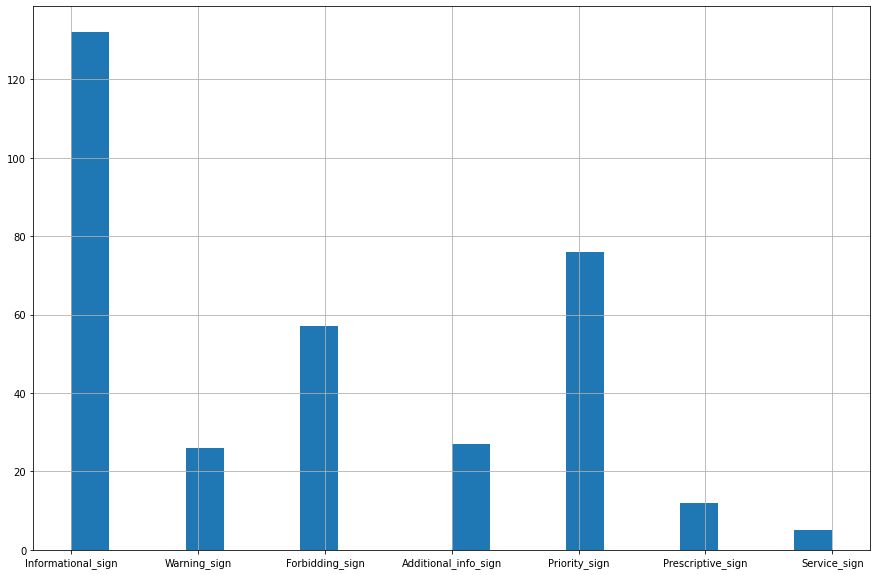

In [8]:
data['class'].hist(figsize=(15, 10), bins=20)

<AxesSubplot:>

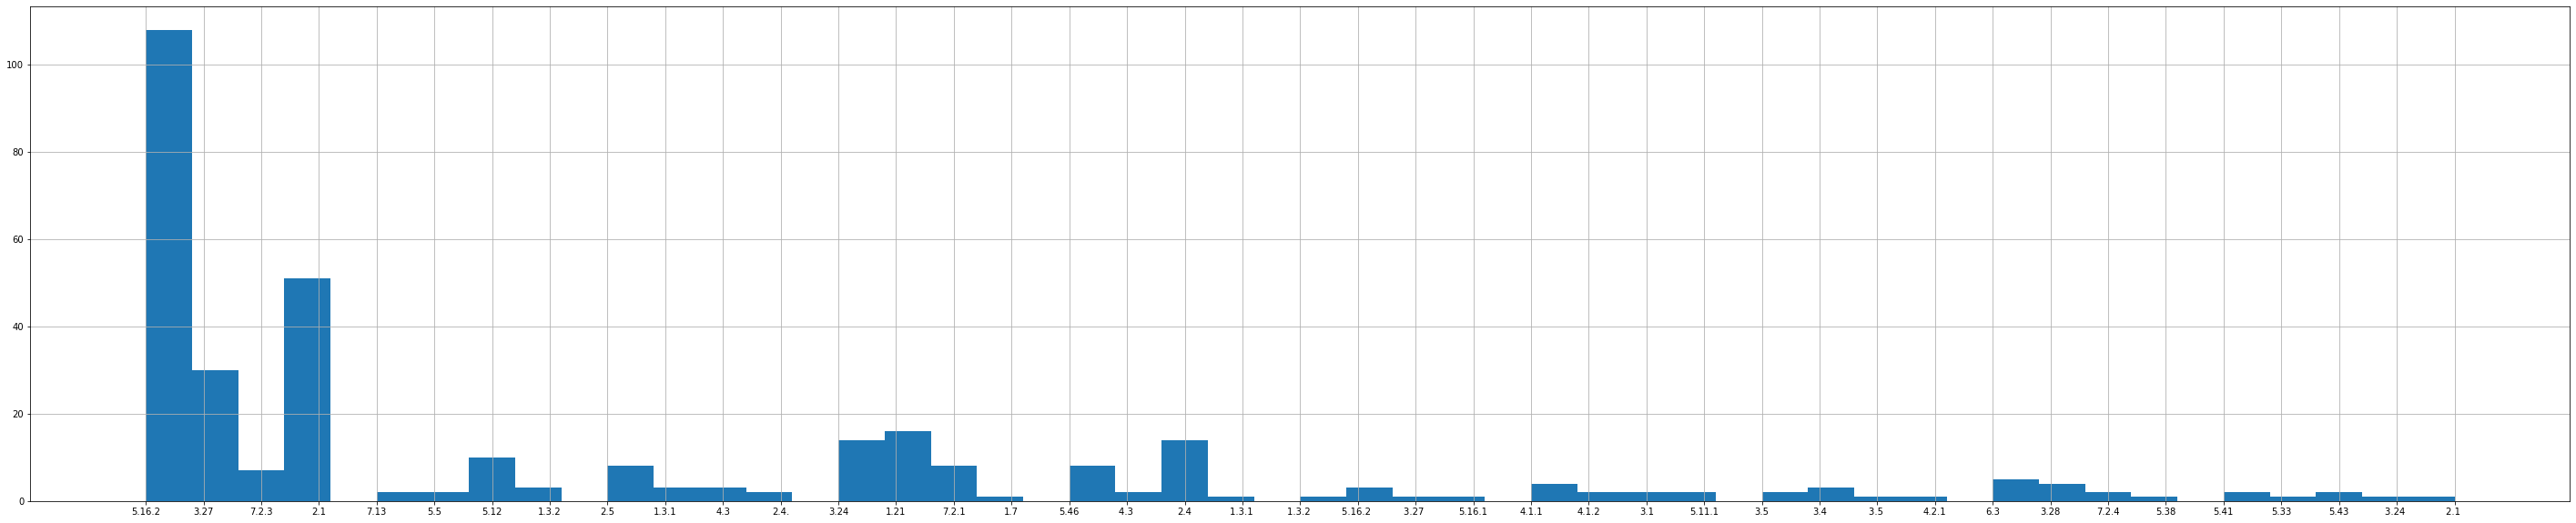

In [9]:
data['name'].hist(figsize=(50, 10), bins = 50)

In [10]:
BOX_COLOR = (255, 0, 0)  # Red
TEXT_COLOR = (255, 255, 255)  # White

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    # x_min, y_min, w, h = bbox
    bbox = [int(i) for i in bbox]
    x_min, y_min, x_max, y_max = bbox

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(str(class_name), cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=str(class_name),
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img

In [11]:
def get_image(data, index):
    bbox_1 = data.iloc[index]['xmin'], data.iloc[index]['ymin'], data.iloc[index]['xmax'], data.iloc[index]['ymax']
    im = cv2.imread(data.iloc[index]["image"])
    im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    return im, bbox_1

In [12]:
list_of_data = []
for i, path in enumerate(list_train):
    data = convertToXYmax(convertFromJson(pd.read_csv(path)))
    file_path = '/'.join(list_train[i].split('/')[:-1]) + '/'
    data['image'] = data['image'].apply(lambda x: file_path + x)
    list_of_data.append(data)

/tmp/ipykernel_31643/1854561321.py:18: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/tmp/ipykernel_31643/3442978218.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)
/tmp/ipykernel_31643/1854561321.py:18: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/tmp/ipykernel_31643/3442978218.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)
/tmp/ipykernel_31643/1854561321.py:18: FutureWarning: In a fut

In [13]:
data = pd.concat(list_of_data, axis=0, ignore_index=True)
data = data[data['name'] != '']
data = data.dropna()
data = data.reset_index(drop=True)

In [14]:
data

,image,xmin,ymin,xmax,ymax,name,class
0,../Road_Signs_Screens/4/NO20220705-134422-0000...,1468.0,748.0,1518.0,797.0,5.16.2,Informational_sign
1,../Road_Signs_Screens/4/NO20220705-134422-0000...,1693.0,384.0,1833.0,505.0,5.16.2,Informational_sign
2,../Road_Signs_Screens/4/NO20220705-134422-0000...,1720.0,707.0,1767.0,760.0,3.27,Warning_sign
3,../Road_Signs_Screens/4/NO20220705-134422-0000...,2008.0,534.0,2064.0,603.0,3.27,Forbidding_sign
4,../Road_Signs_Screens/4/NO20220705-134422-0000...,1591.0,849.0,1632.0,895.0,5.16.2,Informational_sign
...,...,...,...,...,...,...,...
5736,../Road_Signs_Screens/3/Screen (730) 14.07.54....,1485.0,455.0,1585.0,560.0,5.46,Informational_sign
5737,../Road_Signs_Screens/3/Screen (731) 14.08.41....,757.0,429.0,866.0,558.0,5.46,Informational_sign
5738,../Road_Signs_Screens/3/Screen (731) 14.08.41....,224.0,629.0,270.0,708.0,5.43,Informational_sign
5739,../Road_Signs_Screens/3/Screen (731) 14.08.41....,229.0,706.0,271.0,757.0,3.24,Forbidding_sign


In [15]:
index = 96
im, bbox = get_image(data, index)

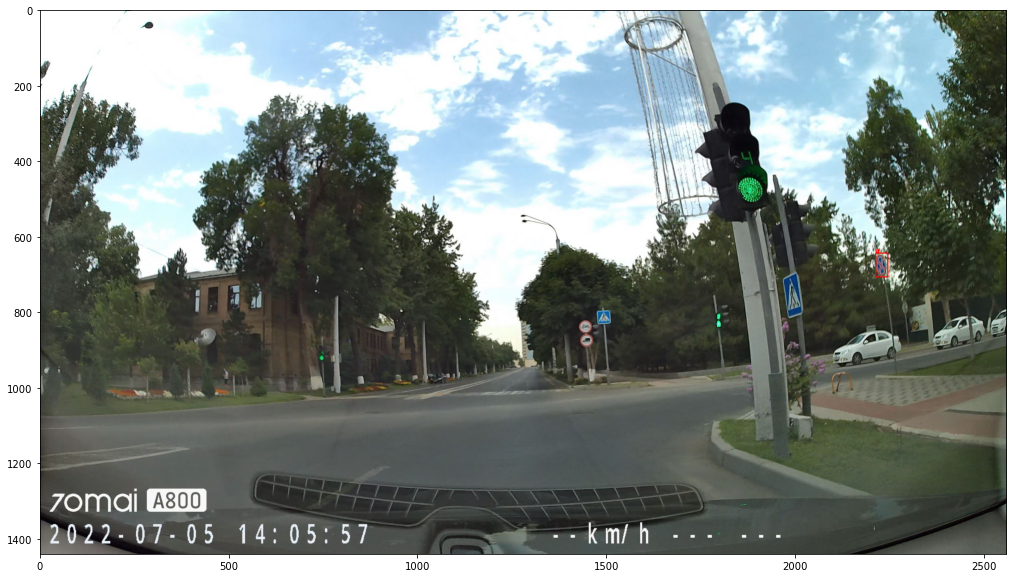

In [16]:
plt.figure(figsize=(20, 10))
plt.imshow(visualize_bbox(im, bbox, 1))

<AxesSubplot:>

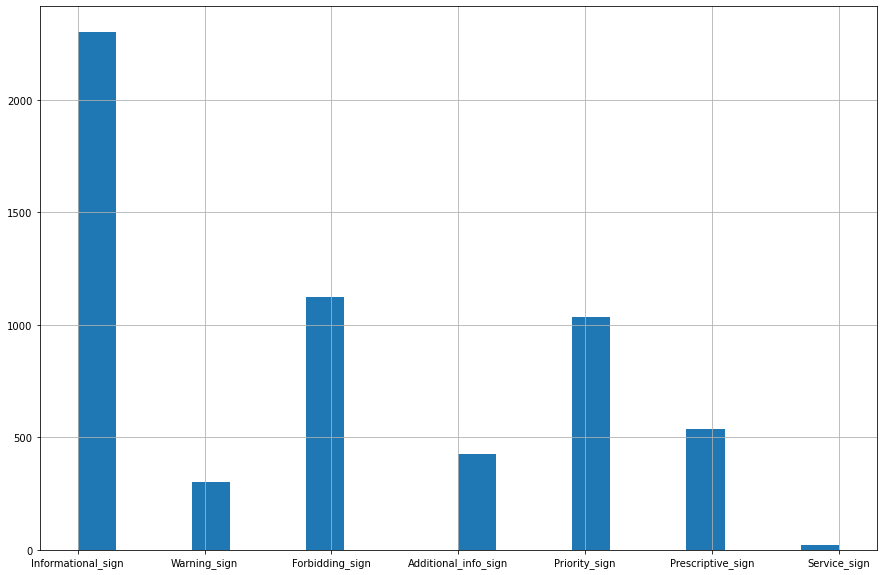

In [17]:
data['class'].hist(figsize=(15, 10), bins=20)

<AxesSubplot:>

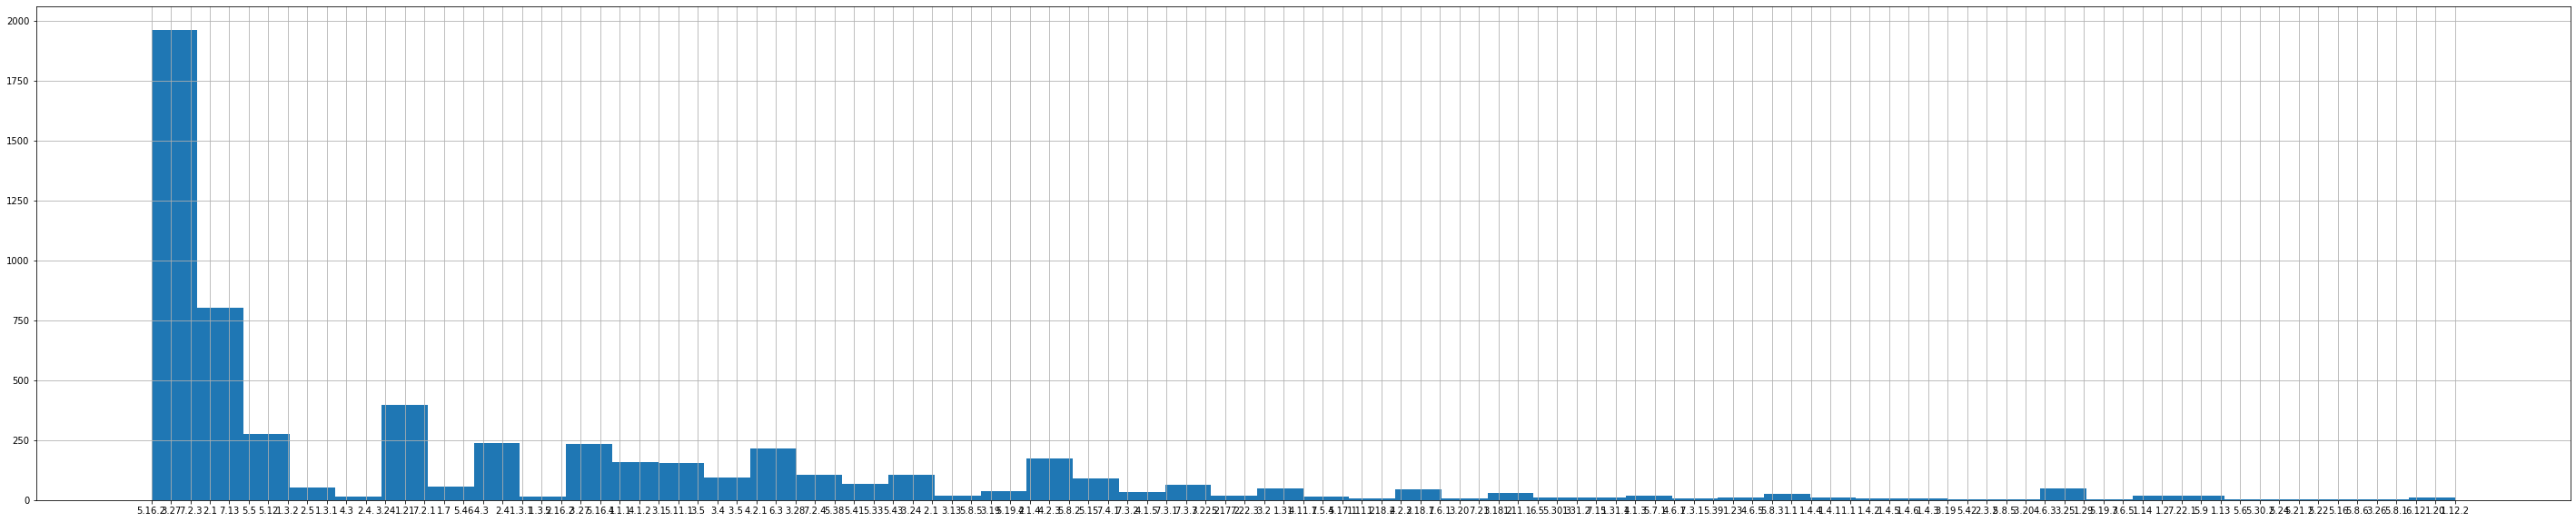

In [18]:
data['name'].hist(figsize=(50, 10), bins = 50)

In [19]:
data.to_csv('my_data.csv')